# Inferencia estadística con Intervalos de confianza

Calcularemos los intervalos de confianza de las proporciones y medias de la población. Analicemos por qué los intervalos de confianza son herramientas útiles para obtener información de los datos.


## Intervalos de confianza

Los intervalos de confianza son un rango o limite calculado alrededor de un parámetro o una estadística que se apoya matemáticamente con un cierto nivel de confianza. Por ejemplo, podemos estimar, conm un 95% de confianza, que la proporción de la población de padres con un niño pequeño que usan un asiento para el automóvil para todos los viajes con su niño pequeño estaba entre el 82.2% y el 87.7%.

Esto es <b>diferente</b> a tener una probabilidad del 95% de que la proporción de la población real está dentro de nuestro intervalo de confianza.

Esencialmente, si repitiéramos este proceso, el 95% de nuestros intervalos de confianza calculados contendría la proporción verdadera.

## ¿Cómo calculamos este intervalo de confianza?

Nuestra ecuación para calcular los intervalos de confianza es la siguiente:                            

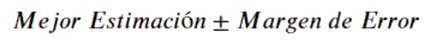

Donde la *Mejor Estimación* es la <b>proporción o media poblacional observada</b> y el *Margen de Error* es el <b>multiplicador t.</b>
    
El multiplicador t se calcula en función de los grados de libertad y el nivel de confianza deseado. Para muestras con más de 30 observaciones y un nivel de confianza del 95% , el multiplicador t es 1,96 (aproximándose a la normal).
    
La ecuación para crear un intervalo de confianza del 95% también se puede mostrar como:

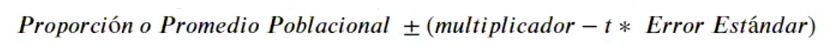

Por último, el error estándar se calcula de forma diferente para la proporción y la media de la población:

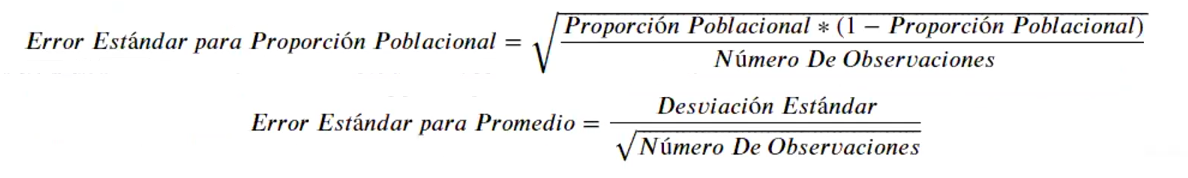

Veamos el ejemplo del asiento para niños en los automóviles.


In [101]:
# importando modulos necesarios
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

In [2]:
tstar = 1.96 # al 95% de confianza (prueba z)
p = .85
n = 659

se = np.sqrt((p * (1 - p))/n)
se

0.01390952774409444

In [3]:
lcb = p - tstar * se
ucb = p + tstar * se
(lcb , ucb)

(0.8227373256215749, 0.8772626743784251)

In [4]:
N=5000
se_N = np.sqrt((p * (1 - p))/n)*np.sqrt((N-n)/(N-1))
lcb = p - tstar * se_N
ucb = p + tstar * se_N
(lcb , ucb)

(0.8245948489749862, 0.8754051510250137)

In [5]:
n*p  # casos de éxito en mi muestra

560.15

In [6]:
# usando statsmodel
sm.stats.proportion_confint(n * p, n)

(0.8227378265796143, 0.8772621734203857)

In [7]:
# veamos con una nueva data
df = pd.read_csv("Data1/Cartwheeldata.csv", sep=',', decimal='.')

In [8]:
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [9]:
df.describe()

,ID,Age,GenderGroup,GlassesGroup,Height,Wingspan,CWDistance,CompleteGroup,Score
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000
mean,13.000000,28.240000,1.520000,0.560000,67.650000,66.260000,82.480000,0.76000,6.400000
std,7.359801,6.989754,0.509902,0.506623,4.431187,5.492647,15.058552,0.43589,2.533114
min,1.000000,22.000000,1.000000,0.000000,61.500000,57.500000,63.000000,0.00000,2.000000
25%,7.000000,24.000000,1.000000,0.000000,64.000000,62.000000,70.000000,1.00000,4.000000
50%,13.000000,26.000000,2.000000,1.000000,68.000000,66.000000,81.000000,1.00000,6.000000
75%,19.000000,29.000000,2.000000,1.000000,71.000000,71.000000,92.000000,1.00000,8.000000
max,25.000000,56.000000,2.000000,1.000000,75.000000,76.000000,115.000000,1.00000,10.000000


In [10]:
mean =df["CWDistance"].mean()
sd = df["CWDistance"].std()
n = len(df)

(n, mean, sd)

(25, 82.48, 15.058552387264855)

In [11]:
tstar = 2.064 # al 95% de confianza de la prueba t (porque la muestra es pequeña al ser 25)

se = sd/np.sqrt(n)

se

3.0117104774529713

In [12]:
lcb = mean - tstar * se
ucb = mean + tstar * se
(lcb, ucb)

(76.26382957453707, 88.69617042546294)

In [13]:
sm.stats.DescrStatsW(df["CWDistance"]).zconfint_mean()

(76.57715593233026, 88.38284406766975)

In [14]:
# calculo del multiplicador del intervalo usando prueba t 
import scipy.stats as ss # importando scipy.stats

df = n-1
t = ss.t(df)

t.ppf(0.975) #al 95% de confianza en el intervalo

2.0638985616280205

In [15]:
t.ppf(0.95) #al 90% de confianza en el intervalo

1.7108820799094275

Ahora construiremos de confianza para proporciones y medias de una tabla. También cubriremos algunos puntos importantes relacionados con las propiedades de los intervalos de confianza y discutiremos cómo usar e interpretar los intervalos de confianza en la práctica. Usaremos el periodo 2015-2016 de los datos de NHANES para todos los análisis a continuación.

Es importante señalar que los datos de NHANES son una "encuesta compleja". Los datos no son una muestra independiente y representativa de la población objetivo. El análisis adecuado de datos de encuestas complejas debe hacer uso de información adicional sobre la forma en que se recopilaron los datos. Dado que el análisis de encuestas complejas es un tema algo especializado, ignoramos este aspecto de los datos aquí y analizamos los datos de NHANES como si fueran una muestra independiente e idénticamente distribuida de una población.

Para muestras proporciones de población, analizaremos la diferencia de propoción entre fumadores y fumadores. La columna que especifica fumador y no fumador es "SMQ020" en nuestro conjunto de datos.

Para nuestras medias poblacionales, analizaremos la diferencia es la media del índice de masa corporal dentro de nuestras poblaciones femenina y masculina. La columna que incluye el valor del índice de masa corporal es "BMXBMI".

Además, el género se especifica en la columna "RIAGENDR".


In [16]:
# cargando la data
da = pd.read_csv("Data1/nhanes_2015_2016.csv", sep=',')

In [17]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [18]:
da.SMQ020.unique()

array([1, 2, 7, 9], dtype=int64)

In [19]:
da.SMQ020.value_counts()

2    3406
1    2319
9       8
7       2
Name: SMQ020, dtype: int64

In [20]:
da["SMQ020x"] = da.SMQ020.replace({1: "Yes",2: "No",7: np.nan, 9: np.nan}) #np.nan represents a mis errores y se reemplaza por vacio
da["RIAGENDRx"] = da.RIAGENDR.replace({1:"Male", 2: "Female"})
da[["SMQ020x", "RIAGENDRx"]]

,SMQ020x,RIAGENDRx
0,Yes,Male
1,Yes,Male
2,Yes,Male
3,No,Female
4,No,Female
...,...,...
5730,Yes,Female
5731,No,Male
5732,Yes,Female
5733,Yes,Male


Ahora podemos tabular el número de mujeres y hombres fumadores y no fumadores:

In [21]:
dx = da[["SMQ020x", "RIAGENDRx"]].dropna() # dropna drops cases where either variable is missing
pd.crosstab(dx.SMQ020x,dx.RIAGENDRx)

RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


El intervalo de confianza (IC) se construye utilizando dos entradas: la propoción de la muestra de fumadores y el tamaño total de la muestra de fumadores y no fumadores combinados. Calculamos estos valores a continuación.

In [22]:
dz = dx.groupby(dx.RIAGENDRx).agg({"SMQ020x": [lambda x: np.mean(x=="Yes"), np.size]})
dz.columns = ["Proportion", "Total_n"] # The default column names are unclear, so we replace them here
dz

,Proportion,Total_n
RIAGENDRx,,
Female,0.304845,2972
Male,0.513258,2753


Los intervalos de confianza están estrechamente relacionados con los errores estándar. Recuerde que el  error estándar esencialmente le dice cómo lejos se debe esperar que una estimación se desvíe de la verdad. Un intervalo de confianza es un intervalo que, en un muestreo repetido, cubre la verdad una proporción definidad del tiempo. En la mayoría de los entornos, esta "probabilidad de cobertura" se establece en 95%.

Resulta que en muchos entornos, se puede construir un intervalo de confianza del 95% como intervalo que consiste en todos los puntos que están dentro de dos (o 1,96) errores estándar de la estimación puntual. De manera más concisa, el intervalo de confianza se extiende aproximadamente desde e - 2SE hasta e + 2SE, donde e es la estimación puntual y SE es el error estándar.

Dado que el error estándar juega un papel tan importante aquí, primero lo calculamos por separado.

In [23]:
p = dz.Proportion.Female # Female proportion
n = dz.Total_n.Female # Total number os females
se_female = np.sqrt(p * (1 - p) / n)
print(se_female)

p = dz.Proportion.Male # Male proportion
n = dz["Total_n"].Male # Total number of males
se_male = np.sqrt(p * (1 - p) / n)
print(se_male)

0.008444152146214435
0.009526078653689868


Podemos ver que los errores estándar para las proporciones estimadas de mujeres y hombres que fuman son similares, y cada uno está alrededor del 1% (dado que estamos estudiando una proporción aquí, 0.01 corresponde a un cambio de 1 punto porcentual en la tasa de tabaquismo).

El error estándar de una proporción se maximiza cuando la proporción verdadera es alrededor de 1/2, y se reduce a medida que la proporción real se acerca a 0 o 1. La proporción estimada de fumadores masculinos está más cerca de 1/2 que la proporción estimada de mujeres fumadoras, y el tamaño de la muestra masculina es menor que el tamaño de la muestra femenina. Ambos factores hacen que el error estándar masculino sea mayor que el error estándar femenino, aunque la diferencia es muy pequeña en este caso. 

A continuación, calculamos los intervalos de confianza del 95% para las proporciones de fumadores y fumadores utilizando la fórmula para el intervalo de confianza de una muestra para una proporción:

In [24]:
p = dz.Proportion.Female # Female proportion
n = dz.Total_n.Female # total number of females
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)
print(lcb, ucb)

0.288294683866098 0.32139576027925865


Los resultados anteriores indican que cualquier proporción de la población (para mujeres fumadoras de por vida) entre 0.288 y 0.321 sería compatible con los datos que observamos en NHANES.

In [25]:
p = dz.Proportion.Male # Male proportion
n = dz.Total_n.Male # total number of males
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)
print(lcb, ucb)

0.49458714955108174 0.531929377873546


Estos resultados indican que cualquier proporción de población (para hombres fumadores de por vida) entre 0,493 y 0,531 sería compatible con los datos de NHANES.

En un análisis de datos de rutina, no es necesario calcular estos intervalos manualmente. Podemos usar la biblioteca Statsmodels para calcular el IC para nosotros en una línea:

In [26]:
# 95% CI for the proportion of females who smoke (compare to value above)
sm.stats.proportion_confint(906, 906+2066)

(0.2882949879861214, 0.32139545615923526)

In [27]:
# 95% CI for the proportion of males who smoke (compare to value above)
sm.stats.proportion_confint(1413, 1413+1340)

(0.49458749263718593, 0.5319290347874418)

## Intervalos de confianza que comparan dos proporciones independientes

Los intervalos de confianza para las proporciones de fumadores masculinos y femeninos que se muestran arriba son bastante estrechos y no se superponen. Esto sugiere que existe una diferencia sustancial entre las tasas de tabaquismo a lo largo de la vida de mujeres y hombres. Sin embargo, aquí no hay información explícita sobre cuán diferentes podrían ser las dos proporciones de población. Para abordar esta pregunta, podemos formar un intervalo de confianza para la diferencia entre la proporción de mujeres que fuman y la proporción de hombres que fuman.

La estimación puntual de la diferencia entre las tasas de tabaquismo de mujeres y hombres es -0,208(0,305 - 0,513). Es decir, la tasa de tabaquismo es aproximadamente 20 puntos porcentuales más alta en los hombres que en las mujeres. Esta diferencia de alrededor de 20 puntos porcentuales es solo una estimación puntual del valor real subyacente; no es exactamente igual a la diferencia entre las proporciones desconocidas de mujeres y hombres que fuman en la población. Un intervalo de confianza nos ayuda qué tan lejos puede estar la diferencia estimada de la diferencia real.

Como arriba, comenzamos con el error estándar. La diferencia entre dos proporciones muestrales basadas en datos independientes tiene un error estándar que refleja la incertidumbre combinada en las dos proporciones diferenciadas. Este error estándar se puede calcular muy fácilmente. Si SE1 y SE2 son los errores estándar para dos proporciones, entonces <b>sqrt(SE1^2 + SE2^2) </b> es el error estándar para la diferencia de estas proporciones (``sqrt`` es la función de raíz cuadrada). Tenga en cuenta que está fórmula solo es precisa si las dos proporciones de muestra que se diferncian son independientes.

En la siguiente celda calculamos el error estándar para la diferencia entre la proporción de mujeres que fuman y la proporción de hombres que fuman.

In [29]:
se_female

0.008444152146214435

In [30]:
se_male

0.009526078653689868

In [28]:
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.012729881381407434

El error estándar de alrededor de 0.013 indica que se espera que la estadística de diferencia estimada -0.208 caiga alrededor de 0.013 unidades del valor real. No sabemos en qué dirección se encuentra el erro, y no sabemos si el error es exactamente 0.013, solo que es alrededor de este grande en promedio. Para la mayoría de los propósitos, un error estándar de 0.013 relativo a una difencia observada de -0.21 se consideraría muy pequeño. Es decir, tenemos una estimación muy precisa de la diferencia entre las tasas de tabaquismo en mujeres y en hombres.

Ahora que tenemos el error estándar, podemos construir un intervalo de confianza del 95% para la diferencia de proporciones tomando la estimación y restando y sumando dos (o 1.96) errores estándar.

In [31]:
dz

,Proportion,Total_n
RIAGENDRx,,
Female,0.304845,2972
Male,0.513258,2753


In [33]:
d = dz.Proportion.Female - dz.Proportion.Male
d

-0.20841304163963553

In [35]:
d = dz.Proportion.Female - dz.Proportion.Male
lcb = d - 2*se_diff # el 2 es 1,96 redondeado 
ucb = d + 2*se_diff
print(lcb, ucb)
print(d) 

-0.2338728044024504 -0.18295327887682067
-0.20841304163963553


El intervalo de confianza del 95% anterior nos muestra que cualquier valor de la diferencia de proporciones de población (entre mujeres y hombres) que se encuentran entre -0.233 y -0.183 es consistente con los datos observados.

## Intervalos de confianza para subpoblaciones

Dado que las tasas de tabaquismo varían mucho con la edad, sería más informativo estratificar los datos en grupos de edad homogéneos y comparar las proporciones de fumadores y fumadores dentro de cada grupo de edad. También podemos calcular el intervalo de confianza del 95% para esta diferencia dentro de cada franja de edad. Estos datos se pueden mostrar como un gráfico, con la diferencia de prporciones trazada como una curva. Los intervalos de confianza se pueden utilizar para construir una "banda de confianza" alrededor de las estimaciones.

In [37]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])

In [41]:
da["agegrp"].value_counts() #particiona

(18, 30]    1153
(30, 40]     932
(50, 60]     924
(40, 50]     903
(60, 70]     878
(70, 80]     812
Name: agegrp, dtype: int64

In [44]:
pr = da.groupby(["agegrp","RIAGENDRx"]).agg({"SMQ020x": lambda x: np.mean(x=="Yes")}).unstack()
pr.columns = ["Female","Male"]

In [45]:
pr

,Female,Male
agegrp,,
"(18, 30]",0.226601,0.349265
"(30, 40]",0.286920,0.502183
"(40, 50]",0.268924,0.448878
"(50, 60]",0.421277,0.572687
"(60, 70]",0.374150,0.654462
"(70, 80]",0.324390,0.649254


In [38]:
#Calculate the smoking rates within age/gender groups
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
pr = da.groupby(["agegrp","RIAGENDRx"]).agg({"SMQ020x": lambda x: np.mean(x=="Yes")}).unstack()
pr.columns = ["Female","Male"]

# The number of people for each calculated proportion
dn = da.groupby(["agegrp", "RIAGENDRx"]).agg({"SMQ020x": np.size}).unstack()
dn.columns = ["Female","Male"]
dn

,Female,Male
agegrp,,
"(18, 30]",609,544
"(30, 40]",474,458
"(40, 50]",502,401
"(50, 60]",470,454
"(60, 70]",441,437
"(70, 80]",410,402


In [49]:
# Standard errors for each proportion
se = np.sqrt(pr * (1- pr) / dn)
se

,Female,Male
agegrp,,
"(18, 30]",0.016964,0.020440
"(30, 40]",0.020776,0.023363
"(40, 50]",0.019790,0.024838
"(50, 60]",0.022776,0.023217
"(60, 70]",0.023043,0.022748
"(70, 80]",0.023120,0.023801


In [60]:
pq.values

array([-0.12266372, -0.21526357, -0.1799535 , -0.15141063, -0.28031258,
       -0.32486349])

In [64]:
?sns.pointplot

In [68]:
x = np.arange(pq.size)
x

array([0, 1, 2, 3, 4, 5])

In [76]:
# Standard error for the difference is female/male somking rates in every age band
se_diff = np.sqrt(se.Female**2 + se.Male**2)

# Standard errors for the difference is smoking rates between genders, within age bands

#The difference is smoking rates between genders
pq = pr.Female - pr.Male

x = np.arange(pq.size)
pp = sns.pointplot(x, pq.values, color='black')

TypeError: pointplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [86]:
x = np.arange(pq.size)
x

array([0, 1, 2, 3, 4, 5])

In [88]:
y = pq.values
y

array([-0.12266372, -0.21526357, -0.1799535 , -0.15141063, -0.28031258,
       -0.32486349])

In [90]:
# Standard errors for each proportion
se = np.sqrt(pr * (1- pr) / dn)

# Standard error for the difference is female/male somking rates in every age band
se_diff = np.sqrt(se.Female**2 + se.Male**2)

# Standard errors for the difference is smoking rates between genders, within age bands

#The difference is smoking rates between genders
pq = pr.Female - pr.Male

x = np.arange(pq.size)
y = pq.values
pp = sns.pointplot(x, y, color='black')
sns.pointplot(x, pq - 2*se_diff)
sns.pointplot(x, pq + 2*se_diff)
pp.set_xticklabels(pq.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male smoking proportion")
plt.show()

TypeError: pointplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

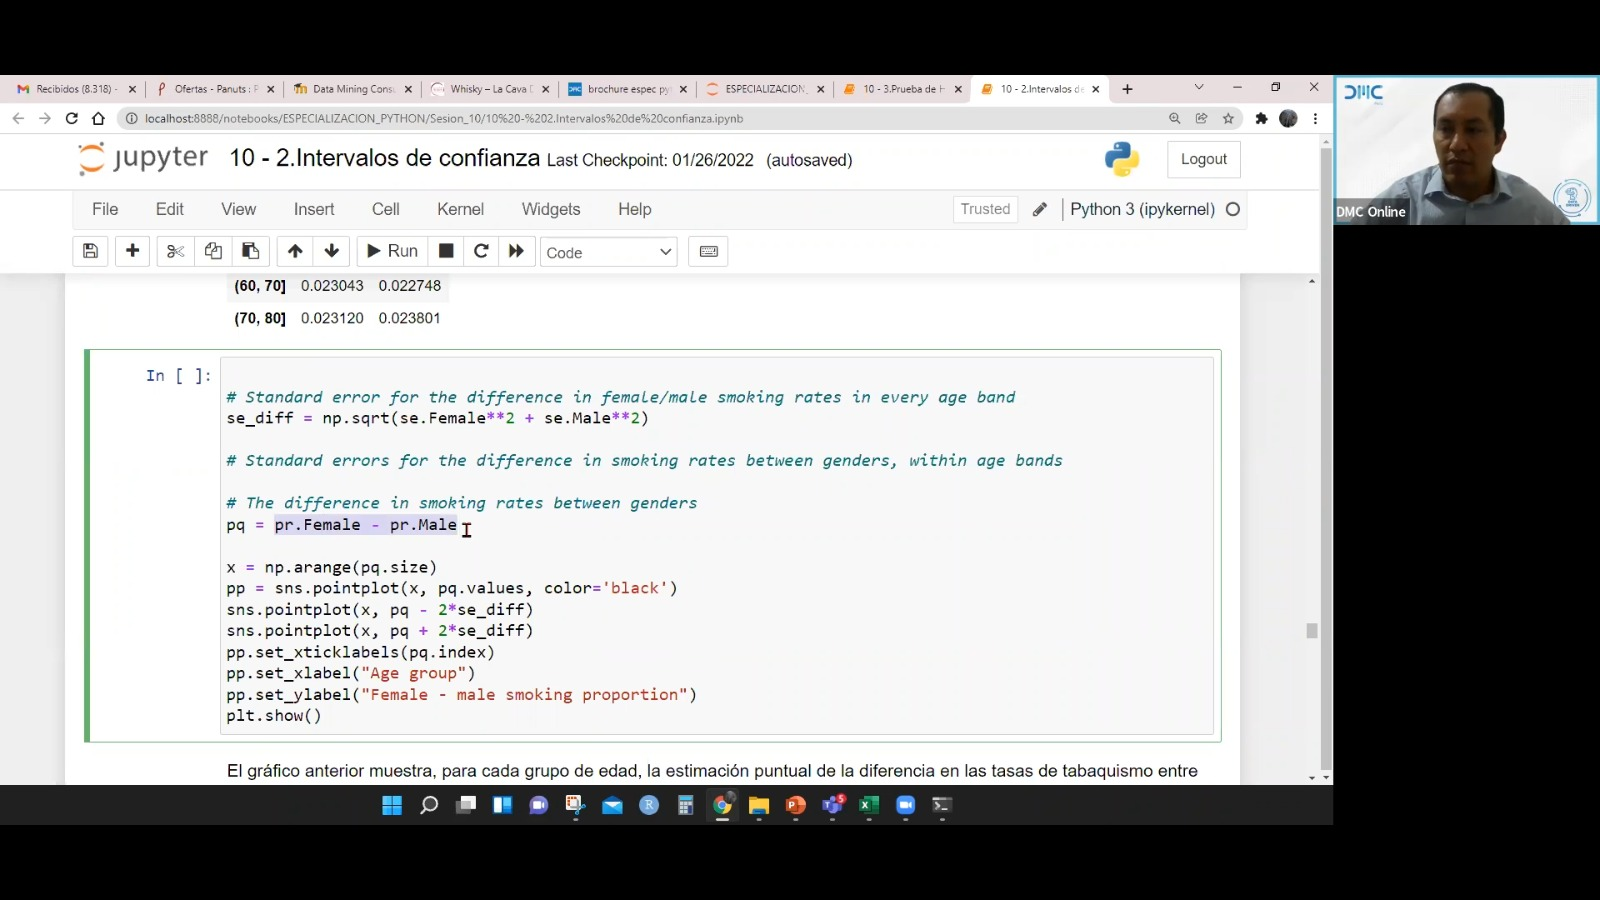

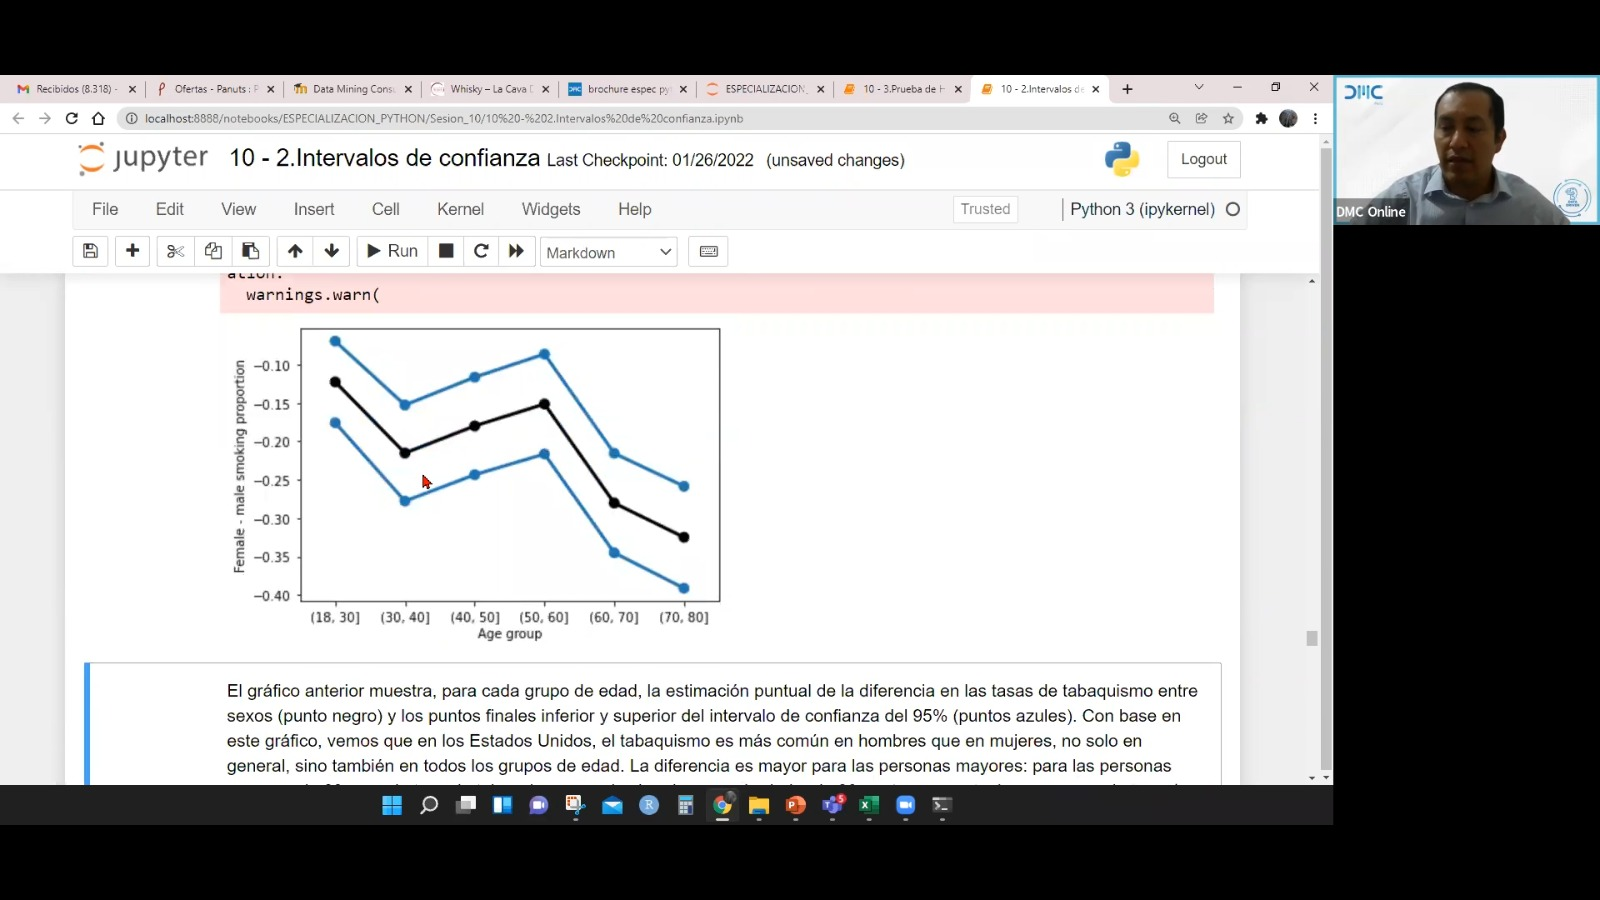

El gráfico anterior muestra, para cada grupo de edad, la estimación puntual de la diferencia en las tasas de tabaquismo entre sexos (punto negro) y los puntos finales inferior y superior del intervalo de confianza del 95% (puntos azules). Con base en este gráfico, vemos que en los Estados Unidos, el tabaquismo es más común en hombres que en mujeres, no solo en general, sino también en todos los grupos de edad. La diferencia es mayor que las personas mayores: para las personas mayores de 60 años, la tasa de tabaquismo para los hombres es alrededor de 30 puntos porcentuales mayor que la tasa de tabaquismo para las mujeres, mientras que para las personas menores de 30 años, la tasa de tabaquismo para los hombres es solo alrededor del 15 por ciento. puntos mayores que la tasa de tabaquismo para las mujeres.

También tenga en cuenta que las bandas de confianza del 95% que se muestran arriba son mucho más amplias que los intervalos de confianza del 95% para los datos que no fueron estratificados por edad. La estratificación por edad conduce a tamaños de muestra más pequeños, lo que a su vez da como resultado intervalos de confianza más amplios.

## Intervalos de confianza para la media

En esta sección, discutimos cómo construir intervalos de confianza para la media. Primero tenga en cuenta que la propporción discutida anteriormente también es una media; por ejemplo, si los datos son 0,1,0, entonces la media es 1/3, que también es la proporción de 1 de los datos. Sin embargo, la proporción tiene la propiedad especial de que la varianza está completamente determinada por la media. Es por eso que construimos los errores estándar para la proporción muestral anterior usando p.(1-p) como la varianza. En general, la varianza de los datos cuantitativos no será una función de la media, ya que esta es una propiedad muy especial de los datos binarios. Por lo tanto, en general debemos estimar la varianza como un paso separado después de estimar la media. 

Para ilustrar la construcción de intervalos de confianza para la media poblacional de una variable cuantitativa, usaremos los datos del índice de masa corporal (IMC) de NHANES. Para empezar, calculamos el IMC medio de todas las mujeres y de todos los hombres de la muestra NHANES.

In [91]:
da.groupby("RIAGENDRx").agg({"BMXBMI": np.})

,BMXBMI
RIAGENDRx,
Female,29.939946
Male,28.778072


Los números de la primera columna de la tabla anterior son estimaciones del IMC medio de la población para todas las mujeres y todos los hombres en los Estados Unidos (la población que la representa el estudio NHANES). Al igual que con las proporciones de la muestra, estos números no son exactamente iguales al IMC medio de todas las mujeres y hombres, son solo estimaciones. Para establecer la incertidumbre de estas estimaciones, podemos utilizar los errores estándar para estas dos medias estimadas.

El error estándar para la media basada en una muestra independiente e idénticamente distribuida es igual a la desviación estándar de la variable dividida por la raíz cuadrada del tamaño de la muestra. A continuación, calculamos todos los valores relevantes necesarios para calcular el error estándar.

In [93]:
da.groupby("RIAGENDRx").agg({"BMXBMI": [np.mean, np.std, np.size]})

BMXBMI                
                mean       std  size
RIAGENDRx                           
Female     29.939946  7.753319  2976
Male       28.778072  6.252568  2759

Ahora podemos calcular el error estándar del IMC medio para mujeres y hombres:

In [94]:
sem_female = 7.753 / np.sqrt(2976)
sem_male = 6.253 / np.sqrt(2759)
print(sem_female, sem_male)

0.14211938534506902 0.119045388988243


Vemos que se espera que el IMC medio de la muestra para las mujeres esté fuera de alrededor de 0,14 en relación con el IMC medio  de la población para las mujeres, y se espera que el IMC medio de la muestra para los hombres esté fuera de alrededor de 0,12 en relación con el IMC medio de la población para los hombres.

El error estándar de la media para las mujeres es ligeramente mayor para las mujeres que para los hombres. La razón de esto es que, aunque el tamaño de la muestra de NHANES para las mujeres es ligeramente mayor que el de los hombres, los datos para las mujeres parecen estas más dispersos. La mayor desviación estándar de los valores del IMC femenino conduce a su vez a una menor precisión el IMC medio poblacional de las mujeres.

Al igual que en el caso de las proporciones, el intervalo de confianza del 95% para la media se puede calcular tomando la estimación más y menos 2 (o 1,96) veces el error estándar. Por tanto, el intervalo de confianza del 95% para el IMC femenino se calcula de la siguiente manera:

In [95]:
lcb_female = 29.94 - 1.96 * 7.753 / np.sqrt(2976)
ucb_female = 29.94 + 1.96 * 7.753 / np.sqrt(2976)
print(lcb_female, ucb_female)

29.661446004723665 30.218553995276338


A continuación, mostramos cómo se puede calcular el intervalo de confianza de una muestra utilizando Statsmodels. Los números difieren ligeramente debido al redondeo en el cálculo anterior. El resultado a continuación es más exacto.

In [96]:
female_bmi = da.loc[da.RIAGENDRx=="Female","BMXBMI"].dropna()
sm.stats.DescrStatsW(female_bmi).zconfint_mean()

(29.659875498090155, 30.22001580625768)

## Intervalos de confianza para la diferencia entre dos medias

Ahora pasamos al estudio de la diferencia entre dos medias, tomando como ilustración la diferencia el IMC medio femenino y masculino. Como se discutió anteriormente, el error estándar para la diferencia de dos medias tomadas de muestra independientes es sqrt(SE1^2 + SE2^2), donde SE1 Y SE2 son los errores estándar para las dos medias que se comparan. A continuación vemos que esto nos da un valor en torno a 0,19 al comparar el IMC femenino con el IMC masculino. Esto es sustancialmente mayor que  el SEM para estimar la media femenina (0.14) o el SEM para estimar la media masculina (0.12). Se espera que  el error estándar para la diferencia entre dos medias sea mayor que los errores estándar para estimar una sola media, ya que la incertidumbre de ambas proporciones específicas de género impacta la estadística.

In [98]:
sem_diff = np.sqrt((sem_female**2 + sem_male**2))
sem_diff

0.18539073420811059

Ahora podemos construir un intervalo de confianza del 95% para la diferencia entre el IMC medio femenino y masculino 

In [99]:
bmi_diff = 29.94 - 28.78
lcb = bmi_diff - 2*sem_diff
ucb = bmi_diff + 2*sem_diff
(lcb, ucb)

(0.789218531583779, 1.5307814684162213)

 Este hallazgo indica que, si bien la estimación puntual muestra que las mujeres de nuestra tienen un IMC aproximadamente 1,1 unidad mayor que los hombres de nuestra muestra, la verdadera diferencia entre la media de todas las mujeres de la población y de todos los hombres de la población podría caer entre 0,79 y 1,53, y seguir siendo coherentes con los datos observados. 

#### Intervalos de confianza estratificados por edad

Como ejemplo final, refinamos el análisis anterior considerando la diferencia de los valores medios del IMC entre mujeres y hombres dentro de las franjas de edad. Vemos a continuación que la diferencia promedio general de 1,1 unidades resulta de diferencias que son muy diferentes según la edad. Específicamente, la diferencia entre el IMC femenino y masculino es mucho menor que 1.1 para las personas más jóvenes y mucho mayor que 1.1 para las personas mayores.

Dado que las bandas de confianza para las personas menores de 40 años contienen 0, los datos son consistentes con que no hay diferencia entre el IMC femenino y masculino en este rango de edad. Para las personas mayores de 40 años, una diferencia hipotética de cero entre los valores medios de IMC para mujeres y hombres no es muy consistente con los datos. De manera informal, podemos decir que los datos sugieren fuertemente que el IMC medio de las mujeres es mayor que el IMC medio de los hombres en esta franja de edad, con una diferencia entre 0,5 y 2 unidades.

In [104]:
# Calculate the mean, SD, and sample size for BMI within age/gender groups
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
pr = da.groupby(["agegrp", "RIAGENDRx"]).agg({"BMXBMI": [np.mean, np.std, np.size]}).unstack()

# Calculate the SEM for females and for males within each age band
pr["BMXBMI", "sem", "Female"] = pr["BMXBMI","std","Female"] / np.sqrt(pr["BMXBMI","size","Female"])
pr["BMXBMI","sem","Male"] = pr["BMXBMI", "std","Male"] / np.sqrt(pr["BMXBMI","size","Male"])

# Calculate the mean difference of BMI between females and males within each band, also calculate
# its SE and the lower and upper limits of its 95% CI.
pr["BMXBMI","mean_diff",""] = pr["BMXBMI","mean","Female"] - pr["BMXBMI", "mean", "Male"]
pr["BMXBMI","sem_diff",""] = np.sqrt(pr["BMXBMI","sem","Female"]**2 + pr["BMXBMI","sem","Male"]**2)
pr["BMXBMI", "lcb_diff", ""] = pr["BMXBMI", "mean_diff",""] - 1.96 * pr["BMXBMI", "sem_diff", ""]
pr["BMXBMI", "ucb_diff", ""] = pr["BMXBMI", "mean_diff", ""] + 1.96 * pr["BMXBMI", "sem_diff", ""]

#Plot the mean difference in black and the confidence limints in blue
x = np.arange(pr.shape[0])
pp = sns.pointplot(x, pr["BMXBMI","mean_diff", ""], color='black')
sns.pointplot(x, pr["BMXBMI", "lcb_diff", ""], color='blue')
sns.pointplot(x, pr["BMXBMI", "ucb_diff",""], color='blue')
pp.set_xticklabels(pr.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male BMI difference")
plt.show()

TypeError: pointplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

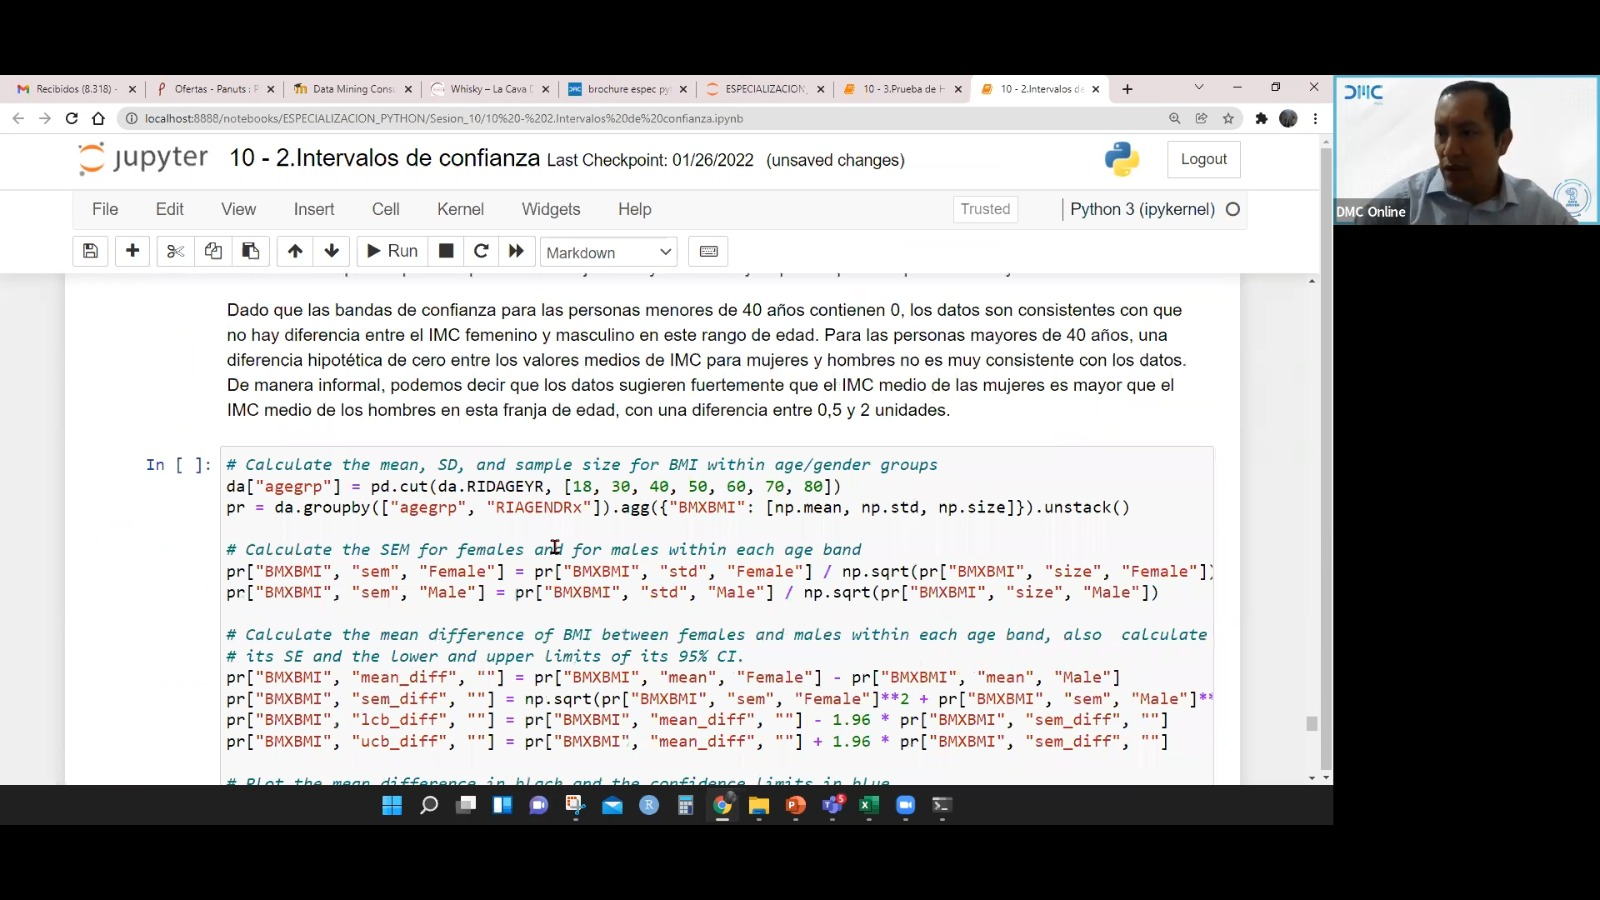

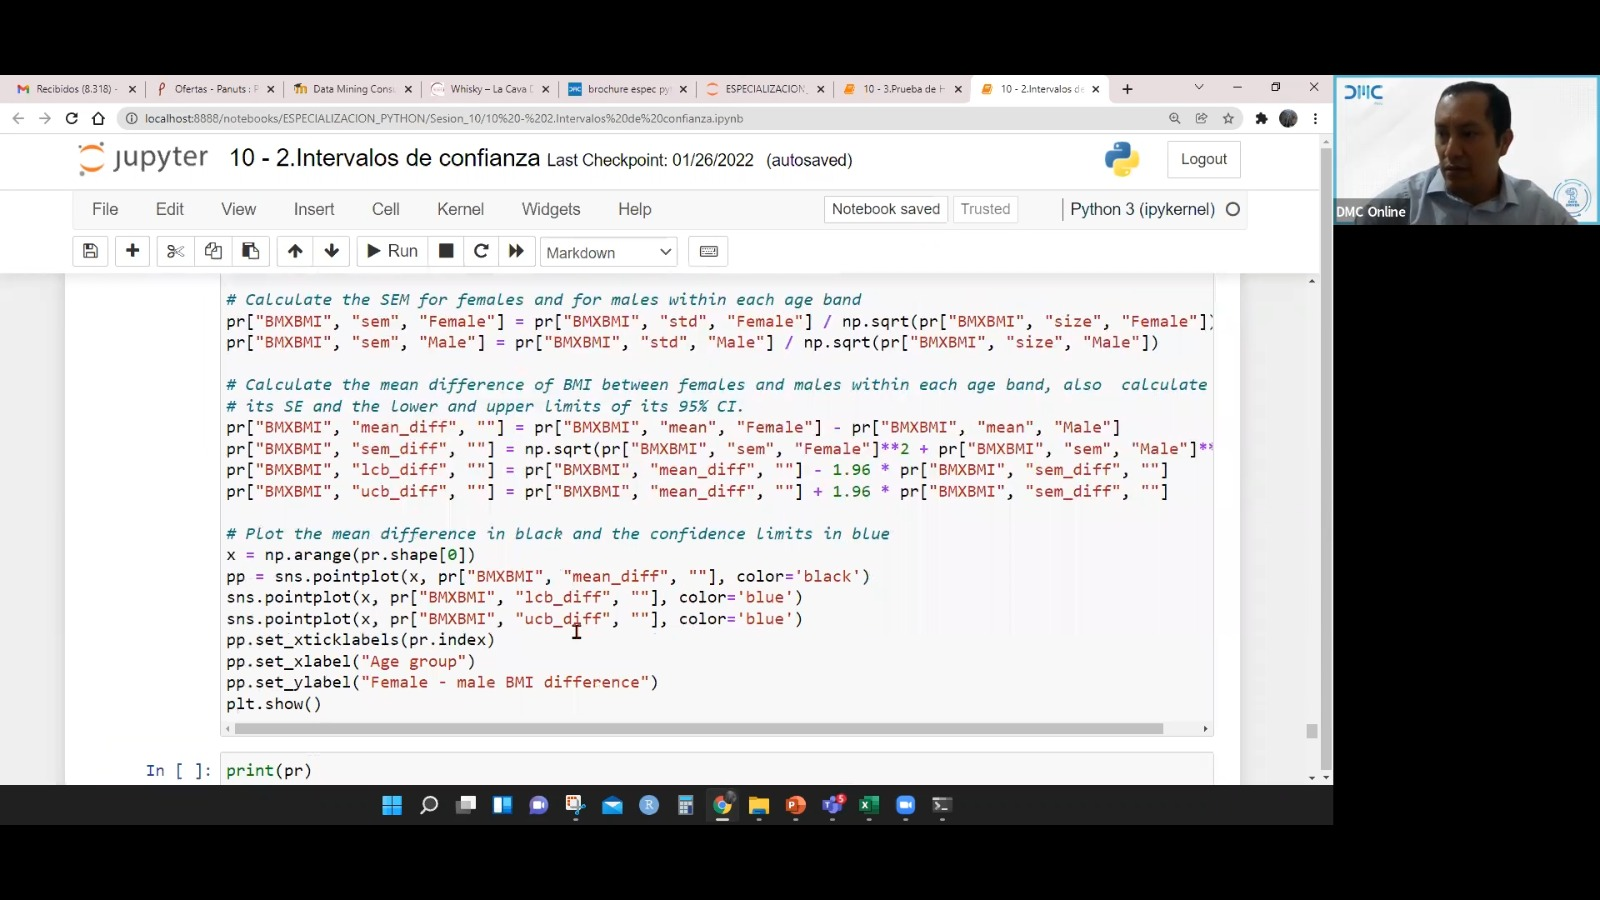

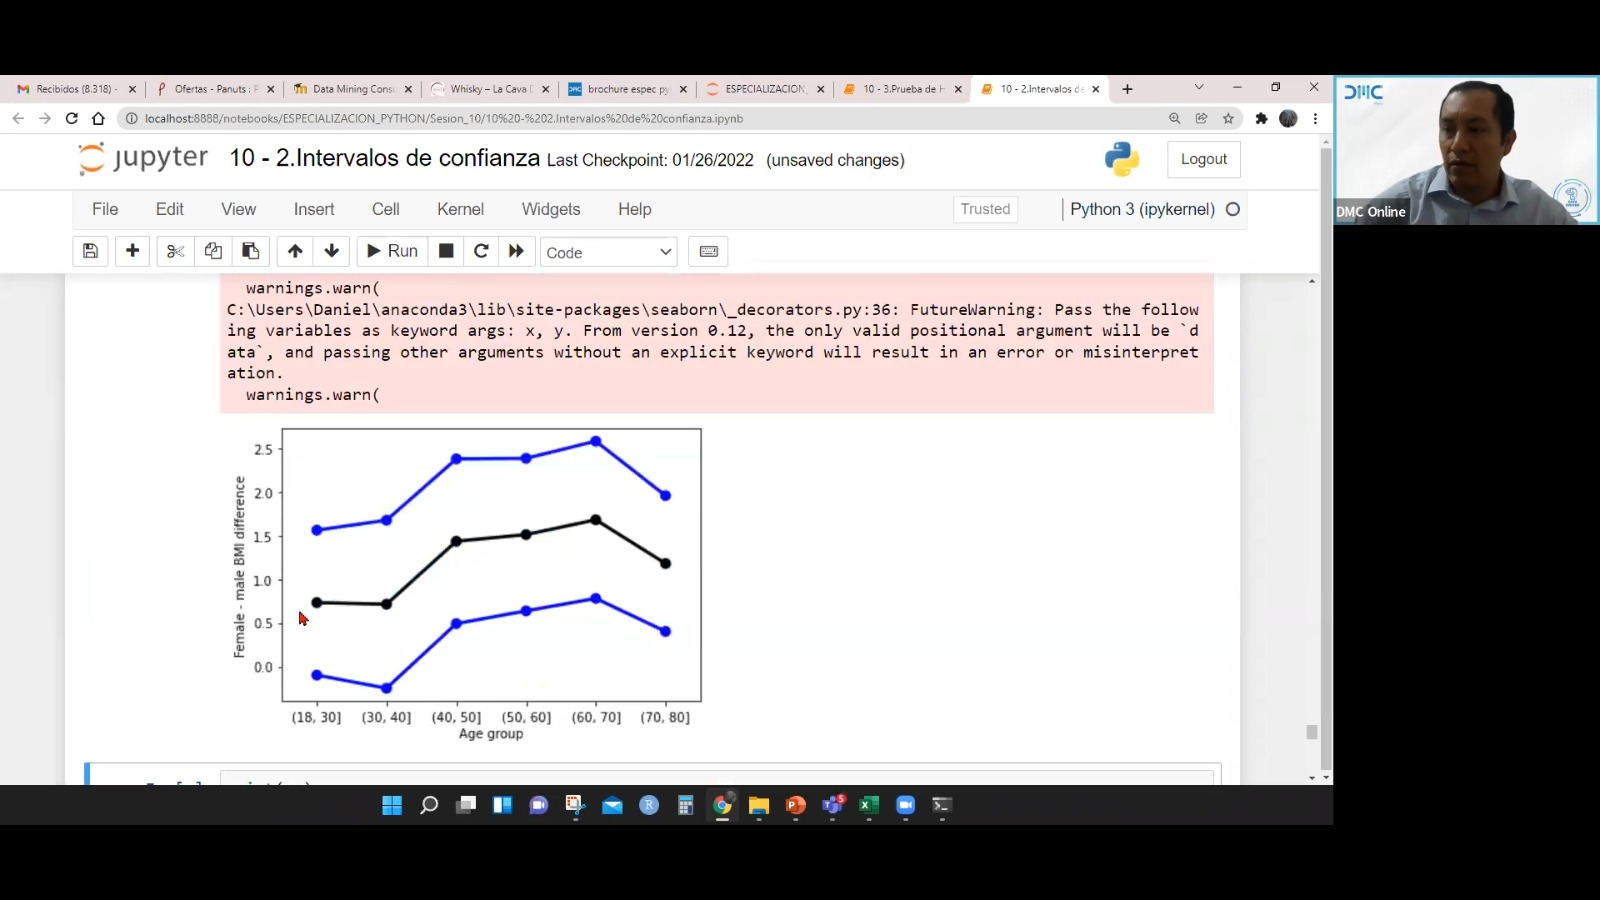

In [105]:
print(pr)

              BMXBMI                                                       \
                mean                  std             size            sem   
RIAGENDRx     Female       Male    Female      Male Female Male    Female   
agegrp                                                                      
(18, 30]   28.123881  27.391822  7.745893  6.649440    609  544  0.313879   
(30, 40]   30.325586  29.611726  8.315608  6.622412    474  458  0.381949   
(40, 50]   31.160643  29.724623  8.076195  6.407076    502  401  0.360458   
(50, 60]   30.743777  29.231486  7.575848  5.914373    470  454  0.349448   
(60, 70]   31.074828  29.392488  7.604514  5.933307    441  437  0.362120   
(70, 80]   29.138213  27.957692  6.284968  4.974855    410  402  0.310392   

                                                             
                    mean_diff  sem_diff  lcb_diff  ucb_diff  
RIAGENDRx      Male                                          
agegrp                                     

## Intervalos de confianza y tamaño de la muestra

Los intervalos de confianza reflejan la precisión de una estimación, que depende en gran medida de la cantidad de datos utilizados para construir la estimación. Podemos explorar la relación entre presición y el tamaño de la muestra submuestreando datos de NHANES y calculando intervalos de confianza para las submuestras. A continuación, calculamos los intervalos de confianza basados en submuestras de tamaño 100,200, 400 y 800.

Un intervalo de confianza más amplio implica que tenemos menos precisión en nuestra estimación. En la siguiente simulación, calculamos el ancho promedio de los intervalos de confianza construidos para cada tamaño de muestra. Vemos que el intervalo de confianza se acorta progresivamente a medida que aumenta el tamaño de la muestra. Para la mayoría de las configuraciones, el intervalo de confianza será aproximadamente la mitad de ancho cuando el tamaño de la muestra se incrementa en un factor de 4. A continuación, vemos esta escala cuando el tamaño de la muestra aumenta de 100 a 400, y cuando aumenta de 200 a 800, ambos de los cuales son incrementos en un factor de 4.

In [107]:
dx = da.loc[da.RIAGENDRx=="Female", ["RIAGENDRx", "BMXBMI"]].dropna()

all_cis = []
for n in 100, 200, 400, 800:
    cis = []
    for i in range(500):
        dz = dx.sample(n)
        ci = sm.stats.DescrStatsW(dz.BMXBMI).zconfint_mean()
        cis.append(ci)
    cis = np.asarray(cis)
    mean_width = cis[:, 1].mean() - cis[:, 0].mean()
    print(n, mean_width)
    all_cis.append(cis)

100 3.018790273242793
200 2.1497935357567
400 1.5137667584123982
800 1.0749093195323667


También es informativo trazar los intervalos de confianza individuales, calculados para 500 submuestras de tamaño 100, para ver cómo varían. Las barras grises verticales debajo de cada una corresponden a un intervalo de confianza. La línea horizontal roja es el IMC medio calculado utilizando el conjunto de datos completo, que puede tomarse como un sustituto de la media de la población. Si bien los intervalos individuales son bastante diferentes entre sí, parece que la gran mayoría de ellos cubren el valor de la población.


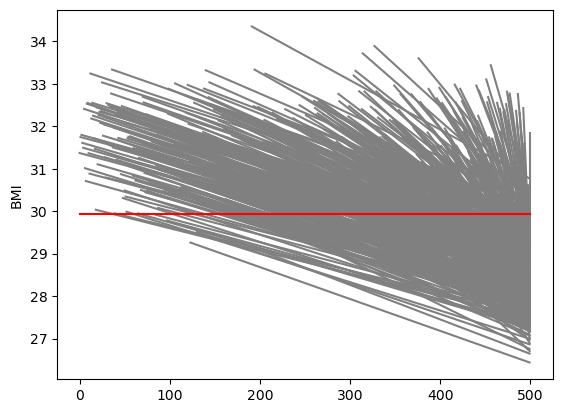

In [108]:
ci = all_cis[0]
for j, x in enumerate(ci):
    plt.plot([i,j], x, color='grey')
    plt.gca().set_ylabel("BMI")
mn = dx.BMXBMI.mean()
plt.plot([0,500], [mn, mn], color='red')
plt.show()